# Exploratory Data Analysis of the Stock Price of major Tech companies

In [35]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime
from datetime import date
%matplotlib inline

In [36]:
start = datetime.datetime(2020, 1, 1)

end = date.today()

In [37]:
# Amazon
Amazon = data.DataReader("AMZN", 'yahoo', start, end)

# Facebook
Facebook = data.DataReader("META", 'yahoo', start, end)

# Google
Google = data.DataReader("GOOG", 'yahoo', start, end)

# Microsoft
Microsoft = data.DataReader("MSFT", 'yahoo', start, end)

# Twitter
Twitter = data.DataReader("TWTR", 'yahoo', start, end)

# Apple
Apple = data.DataReader("AAPL", 'yahoo', start, end)

In [38]:
Amazon.reset_index(inplace=True)
Amazon["Date"].value_counts()
Facebook.reset_index(inplace=True)
Facebook["Date"].value_counts()
Google.reset_index(inplace=True)
Google["Date"].value_counts()
Microsoft.reset_index(inplace=True)
Microsoft["Date"].value_counts()
Twitter.reset_index(inplace=True)
Twitter["Date"].value_counts()
Apple.reset_index(inplace=True)
Apple["Date"].value_counts()

2020-01-02    1
2021-11-23    1
2021-11-26    1
2021-11-29    1
2021-11-30    1
             ..
2020-12-18    1
2020-12-21    1
2020-12-22    1
2020-12-23    1
2022-11-17    1
Name: Date, Length: 727, dtype: int64

In [39]:
Amazon["Company"]='Amazon'
Facebook["Company"]='Facebook'
Microsoft["Company"]='Microsoft'
Twitter["Company"]='Twitter'
Apple["Company"]='Apple'
Google["Company"]='Google'

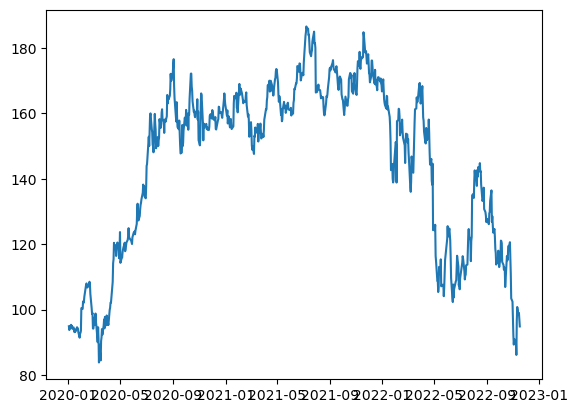

In [40]:
import matplotlib.pyplot as plt

plt.plot(Amazon["Date"], Amazon["Close"])

In [41]:
# Drawing the prices of Amazon using plotly

import plotly.express as px

fig = px.line(Amazon, x="Date", y="Close", title='Closing price for Amazon')
fig.show()

##### Append all the data sets - these six tables

In [42]:
DataSet=pd.concat([Amazon,Facebook,Google,Microsoft,Twitter,Apple],sort=True)
DataSet

,Adj Close,Close,Company,Date,High,Low,Open,Volume
0,94.900497,94.900497,Amazon,2020-01-02,94.900497,93.207497,93.750000,80580000.0
1,93.748497,93.748497,Amazon,2020-01-03,94.309998,93.224998,93.224998,75288000.0
2,95.143997,95.143997,Amazon,2020-01-06,95.184502,93.000000,93.000000,81236000.0
3,95.343002,95.343002,Amazon,2020-01-07,95.694504,94.601997,95.224998,80898000.0
4,94.598503,94.598503,Amazon,2020-01-08,95.550003,94.321999,94.902000,70160000.0
...,...,...,...,...,...,...,...,...
722,149.699997,149.699997,Apple,2022-11-11,150.009995,144.369995,145.820007,93903800.0
723,148.279999,148.279999,Apple,2022-11-14,150.279999,147.429993,148.970001,73374100.0
724,150.039993,150.039993,Apple,2022-11-15,153.589996,148.559998,152.220001,89868300.0
725,148.789993,148.789993,Apple,2022-11-16,149.869995,147.289993,149.130005,64218300.0


In [43]:
average_closing_price=DataSet.groupby('Company').Close.mean().to_frame()
average_closing_price.reset_index(inplace=True)

fig = px.line(average_closing_price, x="Company", y="Close", title='Avg. Closing price')
fig.show()

In [44]:
#Bar chart for better visualization of the above average closing price for each company
average_closing_price=DataSet.groupby('Company').Close.mean().to_frame()
average_closing_price.reset_index(inplace=True)

fig = px.bar(average_closing_price, x="Company", y="Close", title='Avg. Closing price')
fig.show()

In [45]:
import cufflinks as cf
cf.go_offline()

In [46]:
Adj_Close_df = pd.DataFrame()

Adj_Close_df["Dates"] = Amazon["Date"]
Adj_Close_df["Amazon"] = Amazon["Adj Close"]
Adj_Close_df["Facebook"] = Facebook["Adj Close"]
Upd_Adj_Close_df = Adj_Close_df.set_index('Dates')

Upd_Adj_Close_df.iplot(kind='spread', xTitle = "Date", yTitle = "Adj. Closing")

C:\Users\karan\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

C:\Users\karan\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [47]:
returns=pd.DataFrame()

returns=DataSet.groupby('Company').Close.pct_change()
returns

0           NaN
1     -0.012139
2      0.014886
3      0.002092
4     -0.007809
         ...   
722    0.019269
723   -0.009486
724    0.011869
725   -0.008331
726    0.012971
Name: Close, Length: 4347, dtype: float64

In [48]:
DataSet["pct"] = returns
DataSet

,Adj Close,Close,Company,Date,High,Low,Open,Volume,pct
0,94.900497,94.900497,Amazon,2020-01-02,94.900497,93.207497,93.750000,80580000.0,NaN
1,93.748497,93.748497,Amazon,2020-01-03,94.309998,93.224998,93.224998,75288000.0,-0.012139
2,95.143997,95.143997,Amazon,2020-01-06,95.184502,93.000000,93.000000,81236000.0,0.014886
3,95.343002,95.343002,Amazon,2020-01-07,95.694504,94.601997,95.224998,80898000.0,0.002092
4,94.598503,94.598503,Amazon,2020-01-08,95.550003,94.321999,94.902000,70160000.0,-0.007809
...,...,...,...,...,...,...,...,...,...
722,149.699997,149.699997,Apple,2022-11-11,150.009995,144.369995,145.820007,93903800.0,0.019269
723,148.279999,148.279999,Apple,2022-11-14,150.279999,147.429993,148.970001,73374100.0,-0.009486
724,150.039993,150.039993,Apple,2022-11-15,153.589996,148.559998,152.220001,89868300.0,0.011869
725,148.789993,148.789993,Apple,2022-11-16,149.869995,147.289993,149.130005,64218300.0,-0.008331


In [49]:
import plotly.express as px

fig = px.line(DataSet, x="Date", y="pct", color='Company')
fig.show()

In [50]:
std_pct=DataSet.groupby('Company').pct.std().to_frame()
std_pct.reset_index(inplace=True)

fig = px.bar(std_pct, x="Company", y="pct", title='Avg. Standard Deviation')
fig.show()

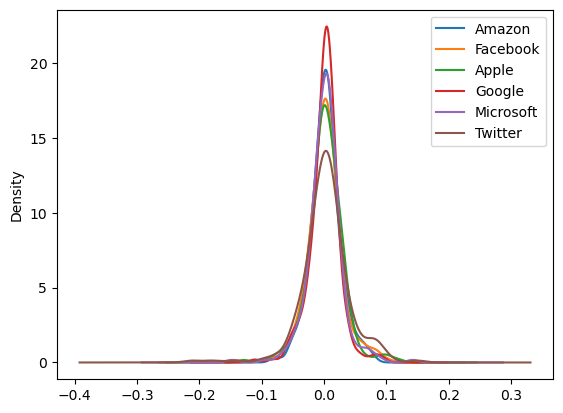

In [51]:
DataSet['Year']=DataSet.Date.map(lambda x:str(x)[:4])
DataSet_2020 = DataSet[DataSet['Year'] == '2020']

DataSet_2020[DataSet_2020["Company"] == "Amazon"].pct.plot.density()
DataSet_2020[DataSet_2020["Company"] == "Facebook"].pct.plot.density()
DataSet_2020[DataSet_2020["Company"] == "Apple"].pct.plot.density()
DataSet_2020[DataSet_2020["Company"] == "Google"].pct.plot.density()
DataSet_2020[DataSet_2020["Company"] == "Microsoft"].pct.plot.density()
DataSet_2020[DataSet_2020["Company"] == "Twitter"].pct.plot.density()
plt.legend(['Amazon','Facebook','Apple','Google','Microsoft','Twitter'])

plt.show()

In [52]:
#Visualizing the above chart using plotly
import plotly.figure_factory as ff
import numpy as np

x1 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Amazon')].dropna(subset = ["pct"])
x2 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Facebook')].dropna(subset = ["pct"])
x3 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Google')].dropna(subset = ["pct"])
x4 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Apple')].dropna(subset = ["pct"])
x5 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Microsoft')].dropna(subset = ["pct"])
x6 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Twitter')].dropna(subset = ["pct"])

hist_data = [x1["pct"], x2["pct"], x3["pct"], x4["pct"], x5["pct"], x6["pct"]]
group_labels = ['Amazon','Facebook','Google','Apple','Microsoft','Twitter']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

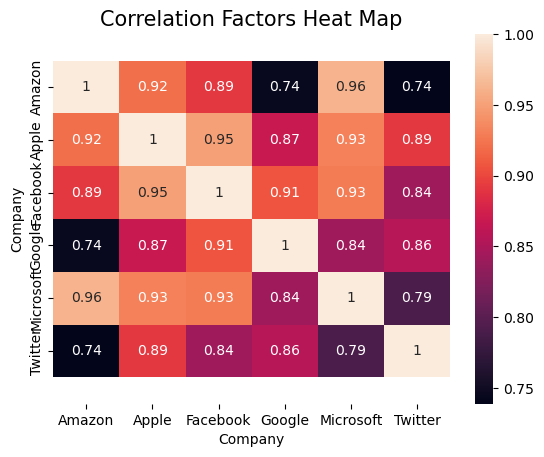

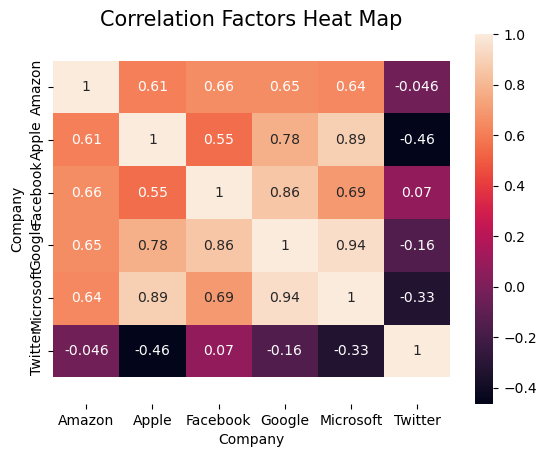

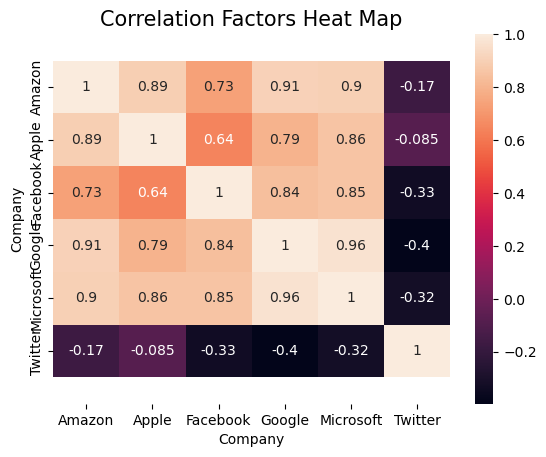

In [53]:
import seaborn as sns
Years = ['2020','2021','2022']

for i in Years:
    DataSet2 = DataSet[DataSet["Year"] == i][['Date', 'Close', 'Company']]
    DataSet2.head()
    df_pivot = DataSet2.pivot('Date','Company','Close').reset_index()
    df_pivot.head()
    sns.heatmap(df_pivot.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.show()

# Exploratory Data Analysis of the Stock Price of major Pharmacy companies

In [54]:
#Initialize the start and end date to fetch the latest data for the year 2022
start = datetime.datetime(2022, 1, 1)

end = date.today()

In [55]:
#Fetch the data for pharmaceutical industry
# Johnson n Johnson
JNJ = data.DataReader("JNJ", 'yahoo', start, end)

# Pfizer
Pfizer = data.DataReader("PFE", 'yahoo', start, end)

# Abbvie
Abbvie = data.DataReader("ABBV", 'yahoo', start, end)

# Novartis
Novartis = data.DataReader("NVS", 'yahoo', start, end)

# Bristol Myers Squibb
BMS = data.DataReader("BMY", 'yahoo', start, end)

# Merck
Merck = data.DataReader("MRK", 'yahoo', start, end)

In [56]:
JNJ.reset_index(inplace=True)
JNJ["Date"].value_counts()
Pfizer.reset_index(inplace=True)
Pfizer["Date"].value_counts()
Abbvie.reset_index(inplace=True)
Abbvie["Date"].value_counts()
Novartis.reset_index(inplace=True)
Novartis["Date"].value_counts()
BMS.reset_index(inplace=True)
BMS["Date"].value_counts()
Merck.reset_index(inplace=True)
Merck["Date"].value_counts()

2022-01-03    1
2022-08-11    1
2022-07-27    1
2022-07-28    1
2022-07-29    1
             ..
2022-04-25    1
2022-04-26    1
2022-04-27    1
2022-04-28    1
2022-11-17    1
Name: Date, Length: 222, dtype: int64

In [57]:
JNJ["Company"]='JnJ'
Pfizer["Company"]='Pfizer'
Abbvie["Company"]='Abbvie'
Novartis["Company"]='Novartis'
BMS["Company"]='BMS'
Merck["Company"]='Merck'

In [58]:
DataSet1=pd.concat([JNJ,Pfizer,Abbvie,Novartis,BMS,Merck],sort=True)
DataSet1

,Adj Close,Close,Company,Date,High,Low,Open,Volume
0,168.227264,171.539993,JnJ,2022-01-03,171.600006,169.100006,170.210007,6012200.0
1,167.776154,171.080002,JnJ,2022-01-04,172.289993,170.600006,171.059998,6748400.0
2,168.894150,172.220001,JnJ,2022-01-05,173.470001,171.619995,172.000000,7016100.0
3,168.315536,171.630005,JnJ,2022-01-06,172.500000,170.800003,172.149994,7301600.0
4,170.590729,173.949997,JnJ,2022-01-07,174.300003,171.130005,171.460007,6986000.0
...,...,...,...,...,...,...,...,...
217,97.959999,97.959999,Merck,2022-11-11,100.809998,97.330002,100.529999,13341600.0
218,100.349998,100.349998,Merck,2022-11-14,101.690002,98.699997,98.699997,8958200.0
219,99.599998,99.599998,Merck,2022-11-15,100.739998,98.709999,100.400002,7965900.0
220,99.930000,99.930000,Merck,2022-11-16,100.800003,99.489998,99.580002,8757700.0


In [59]:
#Comparison of the closing stock price of each company over the period of time

Close_df = pd.DataFrame()

Close_df["Dates"] = Pfizer["Date"]
Close_df["Pfizer"] = Pfizer["Close"]
Close_df["Novartis"] = Novartis["Close"]
Close_df["Abbvie"] = Abbvie["Close"]
Close_df["JNJ"] = JNJ["Close"]
Close_df["Merck"] = Merck["Close"]
Close_df["BMS"] = BMS["Close"]

Upd_Close_df = Close_df.set_index('Dates')

Upd_Close_df.iplot(kind='line', xTitle = "Date", yTitle = "Closing Price", title = "Closing Stock Price Comparison")

- Looking at the trend, we can clearly state that JnJ is the leader in the given group of players in the pharmaceutical industry, with highest stock price closing in the whole year of 2022
- Next major competitor for JnJ is Abbvie, with the later always showing some fight to overtake the prior in terms of the stock price
- In the above trend line we can also observe that in the 2nd pool of competitors there was a major change in the trend when Merck overtook Novartis in mid year '22

In [60]:
# Visualize the average Standard deviation of the Stock Close price over the whole time period

std_pct=DataSet1.groupby('Company').Close.std().to_frame()
std_pct.reset_index(inplace=True)

fig = px.bar(std_pct, x="Company", y="Close", title='Avg. Standard Deviation of Closing Stock price')
fig.show()

- In the above figure, we can observe that the highest avg. std deviation for the closing price is for Abbvie. WHich can infer that the stock price of the company is very volatile when it comes to the stock price and might be a good return on investment over time (at the same time might be even a great risk due to its volatility)

In [61]:
#Calculating pct_change() over time

returns=pd.DataFrame()

returns=DataSet1.groupby('Company').Close.pct_change()
returns

0           NaN
1     -0.002682
2      0.006664
3     -0.003426
4      0.013517
         ...   
217   -0.038571
218    0.024398
219   -0.007474
220    0.003313
221    0.023817
Name: Close, Length: 1332, dtype: float64

In [62]:
DataSet1["pct"] = returns
DataSet1

,Adj Close,Close,Company,Date,High,Low,Open,Volume,pct
0,168.227264,171.539993,JnJ,2022-01-03,171.600006,169.100006,170.210007,6012200.0,NaN
1,167.776154,171.080002,JnJ,2022-01-04,172.289993,170.600006,171.059998,6748400.0,-0.002682
2,168.894150,172.220001,JnJ,2022-01-05,173.470001,171.619995,172.000000,7016100.0,0.006664
3,168.315536,171.630005,JnJ,2022-01-06,172.500000,170.800003,172.149994,7301600.0,-0.003426
4,170.590729,173.949997,JnJ,2022-01-07,174.300003,171.130005,171.460007,6986000.0,0.013517
...,...,...,...,...,...,...,...,...,...
217,97.959999,97.959999,Merck,2022-11-11,100.809998,97.330002,100.529999,13341600.0,-0.038571
218,100.349998,100.349998,Merck,2022-11-14,101.690002,98.699997,98.699997,8958200.0,0.024398
219,99.599998,99.599998,Merck,2022-11-15,100.739998,98.709999,100.400002,7965900.0,-0.007474
220,99.930000,99.930000,Merck,2022-11-16,100.800003,99.489998,99.580002,8757700.0,0.003313


In [63]:
#Comparing the pct change of all the companies over the entire time period

pct_df = pd.DataFrame()

pct_df["Dates"] = DataSet1[DataSet1["Company"] == 'JnJ']["Date"]
pct_df["Pfizer"] = DataSet1[DataSet1["Company"] == 'Pfizer']["pct"]
pct_df["Novartis"] = DataSet1[DataSet1["Company"] == 'Novartis']["pct"]
pct_df["Abbvie"] = DataSet1[DataSet1["Company"] == 'Abbvie']["pct"]
pct_df["JNJ"] = DataSet1[DataSet1["Company"] == 'JnJ']["pct"]
pct_df["Merck"] = DataSet1[DataSet1["Company"] == 'Merck']["pct"]
pct_df["BMS"] = DataSet1[DataSet1["Company"] == 'BMS']["pct"]

Upd_pct_df = pct_df.set_index('Dates')

Upd_pct_df.iplot(kind='line', xTitle = "Date", yTitle = "Closing Price", title = "Closing Stock Price Comparison")

In [64]:
# Visualize the average Standard deviation of the calculated pct_change() over the whole time period

std_pct=DataSet1.groupby('Company').pct.std().to_frame()
std_pct.reset_index(inplace=True)

fig = px.bar(std_pct, x="Company", y="pct", title='Avg. Standard Deviation')
fig.show()

- From the above graph, we can interpret that Pfizer is the most volatile in terms of stock price change daily which makes it the most riskiest stock to invest in

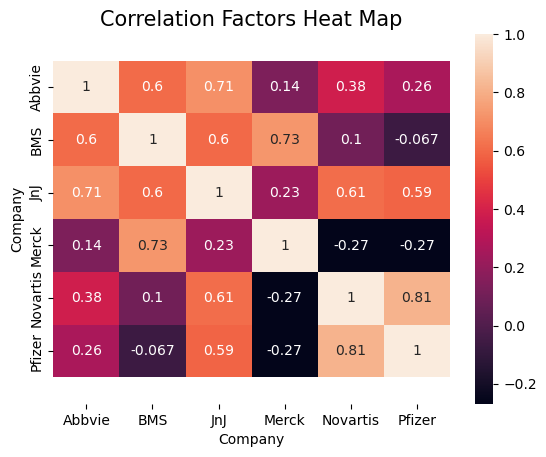

In [65]:
# Visualize a heat map for all the companies and its closing stock price

df_pivot = DataSet1.pivot('Date','Company','Close').reset_index()

sns.heatmap(df_pivot.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

- Few observations from the above chart (specific to the year 2022 - the correlations might differ for a broader timeline):
    - There is no set of companies whose stock are highly related in the given pool
    - There are a few set of companies whose correlation is negative, which would imply that their stock prices are inversely proportional.(eg: Merck and Novartis)

# Great Job!
